# 4. Receiver function

*Andrew Valentine & Malcolm Sambridge - Research School of Earth Sciences, The Australian National University - Last updated Sept. 2019*

'Receiver functions' are a class of seismic data used to study discontinuities (layering) in the Earth's crust. At each discontinuity, P-to-S conversions occur, introducing complexity in the waveform. By deconvolving horizontal- and vertical-channel waveforms from earthquakes at teleseismic distances, we can isolate information about these conversions, and hence learn about the crustal structure. This deconvolved signal is the receiver function, and has a highly non-linear dependence on the local crustal properties.

### Step 1: import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cofi.cofi_objective import ReceiverFunctionObjective, ReceiverFunction
from cofi.optimisers import ScipyOptimiserSolver

/Users/nancyh/Documents/work/lab/cofi/cofi/optimisers/_petsc_tao.py:13: UserWarning: Please install petsc4py if you'd like to use its solvers
  warnings.warn("Please install petsc4py if you'd like to use its solvers")


### Step 2: generate sample data

The actual forward operator is defined in the `ReceiverFunction` class. Instantiate a `ReceiverFunction` and function `ReceiverFunction.calc(model)` computes synthetic receiver functions (using routines developed by Takuo Shibutani). It is called as follows:

```python
rfc_fwd = ReceiverFunction()
t, rf_data = rfc_fwd.calc(model, sn=0.5)
```

where `model` is a NumPy array of dimension `[nlayers,3]`. The values in `model[:,0]` give the depths of discontinuities in the model, while `model[:,1]` contains the S-wave speed above the interface. `model[:,2]` is the ratio of S-wave speed to P-wave speed. The maximum depth of discontinuity that can be considered is 60km.

For example, here is the Earth model.

In [2]:
true_model = np.array(
    [[1, 4.0, 1.7], [3.5, 4.3, 1.7], [8.0, 4.2, 2.0], [20, 6, 1.7], [45, 6.2, 1.7]]
)

Let's plot the Earth model:

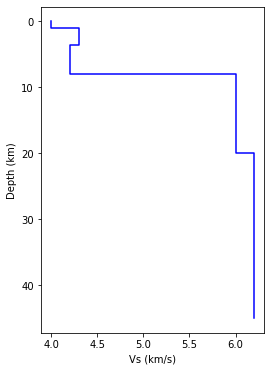

In [3]:
px = np.zeros([2*len(true_model),2])
py = np.zeros([2*len(true_model),2])
n=len(true_model)
px[0::2,0],px[1::2,0],px[1::2,1],px[2::2,1] = true_model[:,1],true_model[:,1],true_model[:,0],true_model[:-1,0]
plt.figure(figsize=(4,6))
plt.xlabel('Vs (km/s)')
plt.ylabel('Depth (km)')
plt.gca().invert_yaxis()
plt.plot(px[:,0],px[:,1],'b-')
plt.show()

Now we calculate the receiver function and plot it:

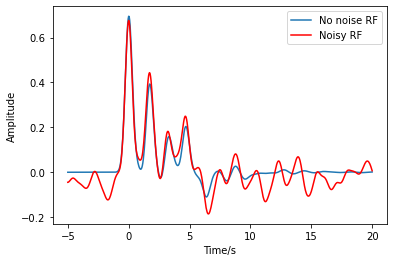

In [4]:
rfc_fwd = ReceiverFunction()
t,rf_data = rfc_fwd.calc(true_model)          # Receiver function
t2,rf_data2 = rfc_fwd.calc(true_model,sn=0.5) # Receiver function with added correlated noise
# t, rf_data = rfcalc(true_model)
# t2, rf_data2 = rfcalc(true_model, sn=0.5)
plt.plot(t, rf_data, label="No noise RF")
plt.plot(t2, rf_data2, "r-", label="Noisy RF")
plt.xlabel("Time/s")
plt.ylabel("Amplitude")
plt.legend()

### Step 3: define objective

In [5]:
model_guess = np.array(
    [[1, 4.0, 1.0], [3.5, 4.3, 1.7], [8.0, 4.2, 2.0], [20, 6, 1.7], [45, 6.2, 1.7]]
)
rfc_obj = ReceiverFunctionObjective(t, rf_data, model_guess)

### Step 4: solve

In [6]:
solver = ScipyOptimiserSolver(rfc_obj)
model = solver.solve("Nelder-Mead")
print(model.values())
print("misfit of true model:", rfc_obj.misfit(true_model))
print("misfit of solved model:", rfc_obj.misfit(model))

[ 1.29643669  3.93890107  1.68173633  1.45862671  4.17059655  1.76965579
 10.07111343  4.26055459  1.95433093 18.08575627  5.94473582  1.70412501
 46.95040559  6.22816745  1.66865759]
misfit of true model: 0.0
misfit of solved model: 0.074510776


----